In [10]:
import numpy as np
from sympy import *
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import optimize
import time

In [7]:
class kite:
    def __init__(self,pos,vel):
        self.mass = 10
#        self.velocity = np.array([10,10,10])
#        self.position = np.array([4.3,4.7,7.26])
        self.velocity = vel
        self.position = pos
        
class tether :
    def __init__(self,l):
        self.length = l #unstreched length
        self.N   = 100 #number of segment 
        self.E   = 9e11          
        self.d   = 0.0025 #diameter of tether [mm]                     
        self.rho = 0.01  #density [kg/m]   
        self.l_e = self.length/(self.N+1)
        self.m_e = self.l_e*self.rho
        self.A  = np.pi*(self.d/2)**2 #area


def line_pos(x,line,kite):
    
    rho_air   = 1.225
    C_d_rope  = 1.2
    L_s = line.l_e
    
    theta     = float(x[0])
    phi       = float(x[1])
    F_0       = x[2]
    T_n_x     = float(F_0*np.sin(theta)*np.cos(phi))
    T_n_y     = float(F_0*np.sin(theta))
    T_n_z     = float(F_0*np.cos(theta)*np.cos(phi))    
    T_n_0       = np.array([T_n_x, T_n_y, T_n_z]) 
    T_j       = T_n_0    
    F_g       = np.array([0,0,-line.m_e*9.81])
    wind = np.array([15,15,0])
    v_cross   = 0
    
     #implémenter plus tard la cross wind speed
    
    P_J       = np.zeros([3,int(line.N)])
    p_j = np.array([0,0,0])
    
    for j in range(0,line.N):        
        T_vec = T_j/(norm(T_j))
        
        v_cross = wind - np.dot(wind,T_vec)*T_vec
        Fk_D_norm = 0.5*rho_air*C_d_rope*line.l_e*line.d*norm(v_cross)*v_cross
        
        
        T_j   = T_j - Fk_D_norm*T_vec-F_g
       
        L_j   = ((norm(T_j)/(line.E*line.A)) +1)*L_s     #length streched d'un element 
        p_j   = p_j + L_j* T_vec
        P_J[:,j]   = p_j
    return p_j

#def g(x):
#    kite = kite1
#    line = tether(9.8) 
#    
#    rho_air   = 1.225
#    C_d_rope  = 1.2
#    L_s = line.l_e
#    
#    theta     = float(x[0])
#    phi       = float(x[1])
#    F_0       = x[2]
#    T_n_x     = float(F_0*np.sin(theta)*np.cos(phi))
#    T_n_y     = float(F_0*np.sin(theta))
#    T_n_z     = float(F_0*np.cos(theta)*np.cos(phi))
#    #T_n_0     = F_0*Matrix([np.sin(theta)*np.cos(phi),np.sin(theta),np.cos(theta)*np.cos(phi)])
#    T_n_0     = np.array([T_n_x, T_n_y, T_n_z]) 
#    T_j       = T_n_0    
#    F_g       = np.array([0,0,-line.m_e*9.81])
 #   P_J       = np.zeros([3,int(line.N)])
 #   p_j = np.array([0,0,0])
 #   
 #   for j in range(0,line.N):        
 #       T_vec = T_j/(norm(T_j))
 #       
 #       v_cross = wind - np.dot(wind,T_vec)*T_vec
 #       Fk_D_norm = 0.5*rho_air*C_d_rope*line.l_e*line.d*norm(v_cross)*v_cross
 #       
 #       
 #       T_j   = T_j - Fk_D_norm*T_vec-F_g
 #      
 #       L_j   = ((norm(T_j)/(line.E*line.A)) +1)*L_s     #length streched d'un element 
 #       p_j   = p_j + L_j* T_vec
 #       P_J[:,j]   = p_j
 #         
 #   tol = norm(p_j-kite.position)
 #   return tol

def line_pos_plot(x,line,kite): #idem que plus haut mais permet de dessiner la ligne 
    rho_air   = 1.225
    C_d_rope  = 1.2
    L_s = line.l_e
    
    theta     = float(x[0])
    phi       = float(x[1])
    F_0       = x[2]
    T_n_x     = float(F_0*np.sin(theta)*np.cos(phi))
    T_n_y     = float(F_0*np.sin(theta))
    T_n_z     = float(F_0*np.cos(theta)*np.cos(phi))    
    T_n_0       = np.array([T_n_x, T_n_y, T_n_z]) 
    T_j       = T_n_0    
    F_g       = np.array([0,0,-line.m_e*9.81])
    wind = np.array([0,15,0])
    v_cross   = 0
    
     #implémenter plus tard la cross wind speed
    
    P_J       = np.zeros([3,int(line.N)])
    p_j = np.array([0,0,0])
    
    for j in range(0,line.N):        
        T_vec = T_j/(norm(T_j))
        
        v_cross = wind - np.dot(wind,T_vec)*T_vec
        Fk_D_norm = 0.5*rho_air*C_d_rope*line.l_e*line.d*norm(v_cross)*v_cross
        
        
        T_j   = T_j - Fk_D_norm*T_vec-F_g
       
        L_j   = ((norm(T_j)/(line.E*line.A)) +1)*L_s     #length streched d'un element 
        p_j   = p_j + L_j* T_vec
        P_J[:,j]   = p_j
        
    ax = plt.axes(projection='3d')# Data for a three-dimensional line
    zline = P_J[0,:]
    xline = P_J[1,:]
    yline = P_J[2,:]
    ax.plot3D(xline, yline, zline, 'red')# Data for three-dimensional
    return p_j 

In [8]:
#fonction pour comparer la position de la ligne et du kite en focntion des inputs x = [angle 1, angle 2, force]
def opti(x,line,kite) :# p_goal = position du kite   
    
    p = line_pos(x,line,kite)
    delta = norm(p-kite.position)
   
    return delta
    

--- 1.2758562564849854 seconds ---
Final delta minimize 0.0985206 
Final input minimize :  [-2.15124994e-06  1.54629684e+00  1.73362519e+02]
Final position minimize :  [-1.04711720e-05 -3.41073278e-04  5.14852009e+00]
--- 21.416321992874146 seconds ---
Final delta brute 0.00445552 
Final input brute :  [-9.02543379e-05 -9.07132854e-02 -1.09215817e-05]
Final position brut :  [4.69860114e-06 2.39093376e-09 5.04554483e+00]
[4.69860114e-06 2.39093376e-09 5.04554483e+00]


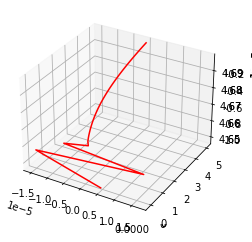

In [17]:

kite_vel = np.array([0,0,0]) # vitesse du kite, pas d'impact pour l'instant 
kite_pos = np.array([0,0,5.05]) # position du kite
line1 = tether(5.1) #longueur du cable 
kite1= kite(kite_pos,kite_vel) 

angle_max = float(np.deg2rad(60))
bouns = ((-angle_max,angle_max),(-angle_max,angle_max), (100,5000))

start_time = time.time()
res = minimize(opti, np.array([0,0,200]),method = None, args=(line1,kite1), constraints=(), tol= 1e-7 )
print("--- %s seconds ---" % (time.time() - start_time))
print("Final delta minimize %g " % (res.fun) )
print("Final input minimize : " , (res.x) )
#print(line_pos(res.x,line,kite),res)
#final = line_pos_plot(res.x,line,kite)
print("Final position minimize : " ,  line_pos_plot(res.x,line1,kite1))
xi = res.x




#version brute
angle_max = float(np.deg2rad(50))
angle_range = (-angle_max, angle_max)
rranges = (angle_range,angle_range,(200,1000))
   
#start_time = time.time()
#resbrute = optimize.brute(opti, rranges,args = (line1,kite1), full_output=True,
                          finish=optimize.fmin)
#print("--- %s seconds ---" % (time.time() - start_time))
#print("Final delta brute %g " % (resbrute[1]) )
#print("Final input brute : " , (resbrute[0]) )
#print("Final position brut : " ,  line_pos_plot(resbrute[0],line1,kite1))
#final2 = line_pos_plot(resbrute[0],line1,kite1)
#print(final2)


In [ ]:
print(resbrute)

In [ ]:
norm(kite_pos
    )

In [ ]:
#version brute
angle_max = float(np.deg2rad(50))
angle_range = (-angle_max, angle_max)
rranges = (angle_range,angle_range,(1,1000))
from scipy import optimize
#resbrute = optimize.brute(g, rranges, args=params, full_output=True,
 #                         finish=optimize.fmin)

resbrute = optimize.brute(g, rranges, full_output=True,
                          finish=optimize.fmin)



In [ ]:
xx2 = minimize(g, np.array([0,0,0.1]), method= 'Powell', tol= 1e-8, callback=None)
#xx = minimize(g, np.array([0,0,0.1]), method= 'BFGS', bounds= bouns, tol= 1e-8, callback=None)
#xx1 = minimize(g, x0, method= 'BFGS', bounds= bouns, tol= 1e-8, callback=None)
print(xx)
print(line_pos(xx.x,line,kite1), g(xx.x))
print(line_pos(xx2.x,line,kite1), g(xx2.x))
print(pf, g(resbrute[0]))
#print(line_pos(xx1.x,line,kite1), g(xx1.x))

In [ ]:
resbrute[0]  # global minimum
print(resbrute)
resbrute[1]  # function value at global minimum
pf = line_pos(resbrute[0],line,kite1)
print(pf,resbrute[0])
print(tidaa)
